In [1]:
import sympy as sp

In [2]:
class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto

## Glossary

ASTM - American Society for Testing and Materials

# Materiels and Manufacturing

### Manufacturing
 - The process of transforming a materiel into something new

### Materiels Science
 - The study of how materiels respond to forces, temperatures, and other factors.

### Primary Bonds (Atom to atom)
 - Ionic
   - One element gives up an electron creating two ions
 - Covalent
   - Valence electrons are shared between two atoms
 - Metallic
   - Valence electrons are shared by the entire block of atoms

### Secondary Bonds (Molecule to molecule)
 - Dipole
   - Opposite electrical polarities attract
 - London
   - Motion of electrons create magnetic eddies that attract
 - Hydrogen
   - Covalent (see above) bonding of hydrogen atoms between molecules

### Stress-Strain Relationships

- Tensile
  - Stretching
- Compressive
  - Squeezing
- Shear
  - Twisting


## Formulae and Definitions

### Definition of stress
$$ \sigma = \frac{F}{A_0} $$
$F$ = Force  
$A_0$ = Original Area

In [3]:
# Define symbols
F, A0 = sp.symbols('F A0')
stress = F / A0

# Display the formula
stress


F/A0

### Definition of Strain

$$ \epsilon = \frac{\Delta L }{L_0} $$

$\Delta L$ = Change in length  
$L_0$ = Original Length

In [4]:
# Engineering strain formula
delta_L, L0 = sp.symbols('Delta_L L0')
strain = delta_L / L0

strain

Delta_L/L0

### Modulus of Elasticity
Also known as Young's Modulus

Defined by Hooke's Law:
$$ \sigma = E \epsilon $$

$\sigma$ = Stress  
$\epsilon$ = Strain
$E$ = Modulus of Elasticity

In [5]:
sigma, epsilon = sp.symbols ('sigma epsilon')

E_modulus = sigma / epsilon

E_modulus

sigma/epsilon

In [6]:
E_modulus.subs(sigma, stress).subs(epsilon, strain)

F*L0/(A0*Delta_L)

### Brinell Hardness

$$ HB = \frac{2F}{\pi D_b (D_b - \sqrt{D_b^2 - D_i^2})} $$

Where:  
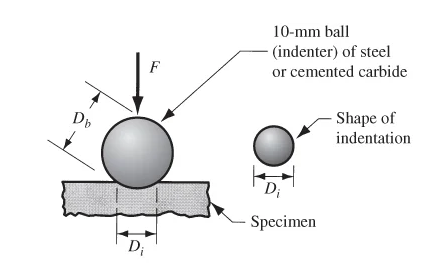

In [7]:
F, D_b, D_i = sp.symbols('F D_b D_i')

BHN = (2 * F) / (sp.pi * D_b * (D_b - sp.sqrt(D_b**2 - D_i**2)))
BHN

2*F/(pi*D_b*(D_b - sqrt(D_b**2 - D_i**2)))

In [8]:
# Example of evaluating BHN using 1500kg load
BHN.subs({
    F: 1500*9.81,   # Mass*Gravity (N)
    D_b: 10,        # Ball Diameter (mm)
    D_i: 3.2        # Indentation Diameter (mm)
    }).evalf()

1781.55613319119

#### Using BHN to estimate ultimate tensile strength of steel

$$ \sigma_{ts} (MPa) = 3.45 * BH $$
$$ \sigma_{ts} (\frac{lb}{in^2}) = 500 * BH $$

In [9]:
estimated_tensile_strength = BHN*3.45

In [10]:
1781.6 *3.45

6146.52

### Thermal Expansion

$$ \Delta L = \alpha * \Delta T * L_0 $$

Where:  
$\Delta L$ = Change in length  
$\alpha$ = Coefficient of thermal expansion  
$L_0$ = Original Length  
$\Delta T$ = Change in temperature: $T_f - T_i$  

In [11]:
alpha, L0, delta_T = sp.symbols('alpha L0 Delta_T')
delta_L = alpha * L0 * delta_T
delta_L

Delta_T*L0*alpha

In [12]:
delta_L.subs({
    alpha: 24*si.u,     # Coefficient of thermal expansion (1/°C)
    L0: .01,            # Original Length (m)
    delta_T: 500-20       # Change in temp (°C)
    }).evalf()

0.000115200000000000

## Transverse Rupture Strength (TRS)

Transverse Rupture Strength (TRS), also known as modulus of rupture or bend strength, measures the tensile strength of materials, particularly brittle ones, under bending loads. It is commonly used for ceramics, hard metals, and certain composites.

The formula for TRS is given by:

$$
\sigma = \frac{3FL}{2bd^2}
$$

where:

- $\sigma$ is the transverse rupture strength (TRS) in MPa
- $F$ is the load at fracture in Newtons (N)
- $L$ is the span length between supports in meters (m)
- $b$ is the width of the specimen in meters (m)
- $d$ is the thickness of the specimen in meters (m)


In [14]:
import sympy as sp

# Define variables
F, L, b, d = sp.symbols('F L b d')

# Formula for transverse rupture strength
transverse_rupture_strength = (3 * F * L) / (2 * b * d**2)

# Display the formula
transverse_rupture_strength


3*F*L/(2*b*d**2)

In [16]:
sigma = sp.symbols('\sigma')
sp.Eq(sigma, transverse_rupture_strength)

Eq(\sigma, 3*F*L/(2*b*d**2))

In [19]:
transverse_rupture_strength.subs({
    F : 1500,
    L : 5,
    b: 0.7,
    d: 0.3
})

178571.428571429

## Viscosity
Viscosity is a measure of a fluid's resistance to deformation or flow. It describes how thick or thin a fluid is, and how easily it flows when subjected to a force. In simple terms, viscosity determines how "sticky" a fluid is. For example, honey has a higher viscosity than water.

### Dynamic Viscosity

The dynamic viscosity ($\mu$) of a fluid is defined as the force per unit area required to move one layer of fluid relative to another at a constant velocity. It is expressed by the following formula:

$$
\tau = \mu \frac{dv}{dy}
$$

Where:

- $\tau$ is the shear stress (force per unit area) in Pascal (Pa)
- $\mu$ is the dynamic viscosity in Pascal-seconds (Pa·s)
- $\frac{dv}{dy}$ is the velocity gradient perpendicular to the direction of the flow


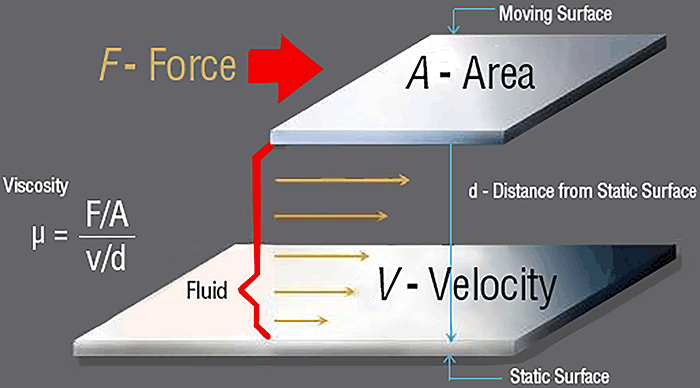

### Kinematic Viscosity
Kinematic viscosity is useful when studying the flow behavior of fluids under the influence of gravity.
Kinematic viscosity ($\nu$) relates the dynamic viscosity to the density ($\rho$) of the fluid and is given by:

$$
\nu = \frac{\mu}{\rho}
$$

Where:

- $\nu$ is the kinematic viscosity in meters squared per second ($m^2/s$)
- $\mu$ is the dynamic viscosity in Pa·s
- $\rho$ is the density in kilograms per cubic meter ($kg/m^3$)